0.14801427316317473 206.7007193391454


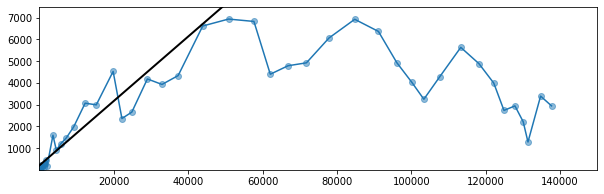

In [66]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

timeseries = [48,79,130,159,196,262,482,670,799,1040,1176,1457,1908,2078,3675,4585,5795,7272,9257,
              12327,15320,19848,22213,24873,29056,32986,37323,43938,50871,57695,62095,66885,71808,
              77872,84794,91159,96092,100123,103374,107663,113296,118181,122171,124908,127854,130072,
              131359,134753,137698]

zuwachs=[timeseries[i+1]-timeseries[i] for i in range(len(timeseries)-1)]
#zuwachs.insert(0,1)

fig, ax = plt.subplots(figsize=(10,3))
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim(10, 100000)
ax.set_xlim(10, 1000000)

gradient, intercept, r_value, p_value, std_err = linregress(timeseries[1:(len(timeseries)-25)], zuwachs[0:(len(zuwachs)-25)])
x = np.linspace(0.01,1000000,1000000)
y = gradient*x+intercept
print(gradient, intercept)

ax.scatter(timeseries[1:len(timeseries)], zuwachs, alpha=0.5)
ax.plot(timeseries[1:len(timeseries)], zuwachs)
ax.set_yscale('linear')
ax.set_xscale('linear')
ax.set_ylim(10, 7500)
ax.set_xlim(10, 150000)
ax.plot(x, y,'k-', lw=2)

plt.show()

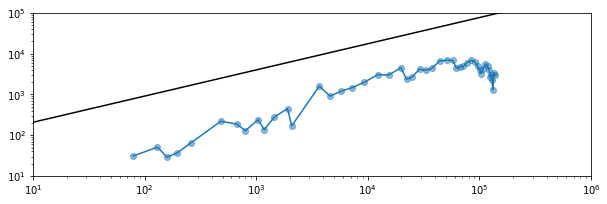

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

timeseries = [48,79,130,159,196,262,482,670,799,1040,1176,1457,1908,2078,3675,4585,5795,7272,9257,
              12327,15320,19848,22213,24873,29056,32986,37323,43938,50871,57695,62095,66885,71808,
              77872,84794,91159,96092,100123,103374,107663,113296,118181,122171,124908,127854,130072,
              131359,134753,137698]

zuwachs=[timeseries[i+1]-timeseries[i] for i in range(len(timeseries)-1)]

gradient, intercept, r_value, p_value, std_err = linregress(
                                                            timeseries[1:(len(timeseries)-25)],
                                                            zuwachs[0:(len(zuwachs)-25)])

fig, ax = plt.subplots(figsize=(10,3))
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim(10, 100000)
ax.set_xlim(10, 1000000)

x = np.linspace(10,10000000,2)
#y = gradient*x+intercept
y = gradient*x+intercept
ax.scatter(timeseries[1:len(timeseries)], zuwachs, alpha=0.5)
ax.plot(timeseries[1:len(timeseries)], zuwachs)
ax.plot(x,y,'k-')